In [23]:
import cv2
import json
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [24]:
VIDEOS_DIR = Path("../../data/videos")   # adapte si besoin
METADATA_JSON = Path("../../data/videos/videos_metadata.json")

with open(METADATA_JSON, "r", encoding="utf-8") as f:
    metadata = json.load(f)

len(metadata)

df = pd.DataFrame(metadata)
df.head()

,CAMERA_FIN_COULOIR_GAUCHE_ETAGE1.mp4,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE.mp4,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2.MP4,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1.MP4,CAMERA_DEVANTURE_SOUS_ARBRE.mp4,CAMERA_DEVANTURE_PORTE_ENTREE.mp4,CAMERA_DEBUT_COULOIR_DROIT.mp4,CAMERA_FIN_COULOIR_DROIT.mp4,CAMERA_HALL_PORTE_GAUCHE.mp4,CAMERA_HALL_PORTE_DROITE.MP4,CAMERA_HALL_PORTE_ENTREE.mp4
file_id,1FO1ndy08IA2yvrEp_OjgzPvjKwfVVJrL,15A1baOeronVCU3wXkAvDGBJxqhW0g3Ts,1j_mGnCZko4mD76cFIdZwcMZQTmm6cVpf,1iWmbp4h0s5kCs5wZDhKyUJOY_To1XcBL,14dj9xeq7mLPjRTrcv0r9L7j_FyHkwvbQ,1x1hIUVPqRij52d4DIl8hsRgdLCn042x-,17QjAU3o7eq5oLXGEY11Ch7xTZ1L1kIrp,1e9QJPlRIELfMgFcvNlpEeAIwlmIUDg0U,1jpmJEPyNWYznoup4F-s1T0Nfu0U8cFiL,1r1SqjBMzAynTnLx1YH9mEUS2nIXhzuJY,1aFLUoXD1rDA30w5N4oLjO-LJCw17Dlra
local_path,data/videos\CAMERA_FIN_COULOIR_GAUCHE_ETAGE1.mp4,data/videos\CAMERA_ESCALIER_DEBUT_COULOIR_GAUC...,data/videos\CAMERA_FIN_COULOIR_GAUCHE_REZ_PART...,data/videos\CAMERA_FIN_COULOIR_GAUCHE_REZ_PART...,data/videos\CAMERA_DEVANTURE_SOUS_ARBRE.mp4,data/videos\CAMERA_DEVANTURE_PORTE_ENTREE.mp4,data/videos\CAMERA_DEBUT_COULOIR_DROIT.mp4,data/videos\CAMERA_FIN_COULOIR_DROIT.mp4,data/videos\CAMERA_HALL_PORTE_GAUCHE.mp4,data/videos\CAMERA_HALL_PORTE_DROITE.MP4,data/videos\CAMERA_HALL_PORTE_ENTREE.mp4
size_bytes,255623970,1472392299,122971987,102514957,417150858,353210430,388122368,412839594,363766149,225662775,765843947
mime_type,video/mp4,video/mp4,video/mp4,video/mp4,video/mp4,video/mp4,video/mp4,video/mp4,video/mp4,video/mp4,video/mp4
created_time,2025-12-11T16:49:11.147Z,2025-12-11T13:30:51.706Z,2025-12-11T13:23:52.768Z,2025-12-11T13:23:36.903Z,2025-12-11T13:26:35.928Z,2025-12-11T13:25:09.128Z,2025-12-11T13:25:50.459Z,2025-12-11T13:23:22.636Z,2025-12-11T13:24:31.541Z,2025-12-11T13:28:20.965Z,2025-12-11T13:27:54.354Z


In [25]:
video_files = sorted(VIDEOS_DIR.glob("*.mp4"))
test_video = video_files[0]
cap = cv2.VideoCapture(str(test_video))

cap.isOpened()

True

In [26]:
ret, frame = cap.read()
cap.release()

ret, frame.shape

(True, (720, 1280, 3))

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

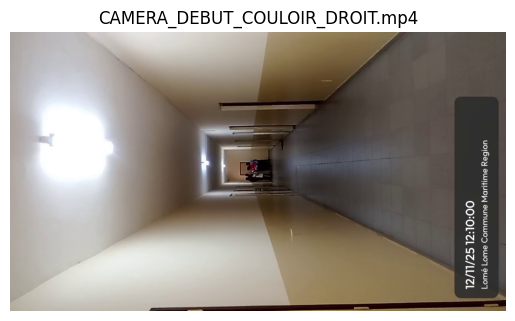

In [27]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title(test_video.name)
plt.axis("off")


In [28]:
cap = cv2.VideoCapture(str(test_video))

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

cap.release()

duration_sec = frame_count / fps if fps > 0 else 0

fps, width, height, frame_count, duration_sec
df_videos = pd.DataFrame(columns=["filename", "fps", "width", "height", "frame_count", "duration_sec"])
df_videos.loc[0] = [str(test_video), fps, width, height, frame_count, duration_sec]
df_videos

,filename,fps,width,height,frame_count,duration_sec
0,..\..\data\videos\CAMERA_DEBUT_COULOIR_DROIT.mp4,29.560836,1280,720,20421,690.812678


In [29]:
rows = []

for video_path in video_files:
    cap = cv2.VideoCapture(str(video_path))
    
    if not cap.isOpened():
        rows.append({
            "video_name": video_path.name,
            "status": "CORRUPTED"
        })
        continue
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    
    rows.append({
        "video_name": video_path.name,
        "fps": fps,
        "width": width,
        "height": height,
        "frame_count": frame_count,
        "duration_sec": frame_count / fps if fps > 0 else 0,
        "status": "OK"
    })

df = pd.DataFrame(rows)
df.head()

,video_name,fps,width,height,frame_count,duration_sec,status
0,CAMERA_DEBUT_COULOIR_DROIT.mp4,29.560836,1280,720,20421,690.812678,OK
1,CAMERA_DEVANTURE_PORTE_ENTREE.mp4,28.908054,1280,720,18173,628.648333,OK
2,CAMERA_DEVANTURE_SOUS_ARBRE.mp4,29.795923,1280,720,21897,734.899211,OK
3,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE.mp4,29.917371,1920,1080,22060,737.364267,OK
4,CAMERA_FIN_COULOIR_DROIT.mp4,29.624854,1280,720,21471,724.763056,OK


In [30]:
df.to_csv("../../database/videos.csv", index=False)
